# RNN applied to the Neurocomputing Dataset 


In [5]:
import scipy.io
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Load the .mat files
mat_invol_jap = scipy.io.loadmat('dataset/jap_blink_involuntary.mat')
mat_vol_jap = scipy.io.loadmat('dataset/jap_blink_voluntary.mat')

# Extract the data from the .mat files
data_invol_jap = mat_invol_jap['jap_blink_involuntary']
data_vol_jap = mat_vol_jap['jap_blink_voluntary']

# Number of features ('FP1' and 'FP2'), time steps and samples
n_features_jap = data_invol_jap.shape[0]
n_timesteps_jap = data_invol_jap.shape[1]
n_samples_invol_jap = data_invol_jap.shape[2]
n_samples_vol_jap = data_vol_jap.shape[2]

# Reshape the data to be of size (samples, timesteps, features)
data_invol_jap = np.transpose(data_invol_jap, (2, 1, 0))
data_vol_jap = np.transpose(data_vol_jap, (2, 1, 0))

# Create labels for the involuntary (0) and voluntary (1) data
labels_invol_jap = np.zeros((n_samples_invol_jap, 1))
labels_vol_jap = np.ones((n_samples_vol_jap, 1))

# Combine the involuntary and voluntary data and labels
X_jap = np.concatenate((data_invol_jap, data_vol_jap), axis=0)
y_jap = np.concatenate((labels_invol_jap, labels_vol_jap), axis=0)


In [6]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Conv1D, Bidirectional
from keras.layers import MaxPooling1D, Dropout, BatchNormalization
from sklearn.model_selection import train_test_split

# Split the data into training and temporary sets (70% training, 30% temporary)
X_temp_jap, X_train_jap, y_temp_jap, y_train_jap = train_test_split(X_jap, y_jap, test_size=0.7, random_state=42, shuffle=True)

# Split the temporary set into validation and test sets (50% validation, 50% test)
X_val_jap, X_test_jap, y_val_jap, y_test_jap = train_test_split(X_temp_jap, y_temp_jap, test_size=0.5, random_state=42, shuffle=True)


In [7]:
from keras.optimizers import Adam
# Define the model
model_jap = Sequential()

# Convolutional layer
model_jap.add(Conv1D(64, 3, activation='relu', input_shape=(n_timesteps_jap, n_features_jap)))
model_jap.add(MaxPooling1D(3))

# Batch normalization layer
model_jap.add(BatchNormalization())

# LSTM layer
model_jap.add(Bidirectional(LSTM(25, return_sequences=True)))  # Bidirectional LSTM layer with 50 units

# Dropout for regularization
model_jap.add(Dropout(0.5))

# LSTM layer
model_jap.add(Bidirectional(LSTM(50)))  # Another Bidirectional LSTM layer with 50 units

# Output layer for binary classification
model_jap.add(Dense(1, activation='sigmoid'))  

learning_rate = 0.00021  # Set the learning rate
optimizer_jap = Adam(learning_rate=learning_rate)
model_jap.compile(loss='binary_crossentropy', optimizer=optimizer_jap, metrics=['accuracy'])

# Train the model on the training data and validate on the validation data
history_jap = model_jap.fit(X_train_jap, y_train_jap, epochs=100, batch_size=32, validation_data=(X_val_jap, y_val_jap))

# Test the model on the test data
test_loss_jap, test_accuracy_jap = model_jap.evaluate(X_test_jap, y_test_jap)
print(f'Test loss: {test_loss_jap}, Test accuracy: {test_accuracy_jap}')

Epoch 1/100
19/19 [==============================] - 9s 251ms/step - loss: 0.6899 - accuracy: 0.5390 - val_loss: 0.6724 - val_accuracy: 0.6357
Epoch 2/100
19/19 [==============================] - 4s 198ms/step - loss: 0.6789 - accuracy: 0.5688 - val_loss: 0.6607 - val_accuracy: 0.6434
Epoch 3/100
19/19 [==============================] - 4s 199ms/step - loss: 0.6647 - accuracy: 0.6119 - val_loss: 0.6444 - val_accuracy: 0.6434
Epoch 4/100
19/19 [==============================] - 6s 320ms/step - loss: 0.6373 - accuracy: 0.6833 - val_loss: 0.6103 - val_accuracy: 0.6279
Epoch 5/100
19/19 [==============================] - 5s 252ms/step - loss: 0.5878 - accuracy: 0.7197 - val_loss: 0.5275 - val_accuracy: 0.7442
Epoch 6/100
19/19 [==============================] - 3s 175ms/step - loss: 0.5190 - accuracy: 0.7745 - val_loss: 0.4959 - val_accuracy: 0.7674
Epoch 7/100
19/19 [==============================] - 3s 184ms/step - loss: 0.5000 - accuracy: 0.7711 - val_loss: 0.5040 - val_accuracy: 0.7209

Epoch 58/100
19/19 [==============================] - 4s 192ms/step - loss: 0.1338 - accuracy: 0.9486 - val_loss: 0.1626 - val_accuracy: 0.9380
Epoch 59/100
19/19 [==============================] - 4s 185ms/step - loss: 0.1127 - accuracy: 0.9585 - val_loss: 0.0691 - val_accuracy: 0.9845
Epoch 60/100
19/19 [==============================] - 4s 190ms/step - loss: 0.1077 - accuracy: 0.9652 - val_loss: 0.0785 - val_accuracy: 0.9767
Epoch 61/100
19/19 [==============================] - 4s 188ms/step - loss: 0.1059 - accuracy: 0.9652 - val_loss: 0.1098 - val_accuracy: 0.9690
Epoch 62/100
19/19 [==============================] - 4s 188ms/step - loss: 0.0989 - accuracy: 0.9685 - val_loss: 0.1352 - val_accuracy: 0.9612
Epoch 63/100
19/19 [==============================] - 4s 196ms/step - loss: 0.1390 - accuracy: 0.9519 - val_loss: 0.0692 - val_accuracy: 0.9767
Epoch 64/100
19/19 [==============================] - 4s 193ms/step - loss: 0.0996 - accuracy: 0.9735 - val_loss: 0.0700 - val_accuracy:

5/5 [==============================] - 2s 62ms/step


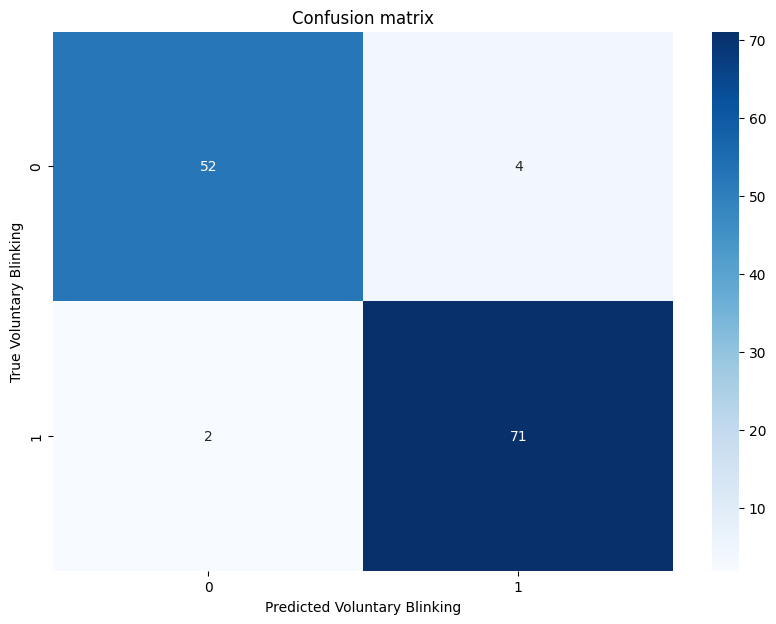

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import argmax

# predict the values from the test dataset
y_pred_jap = model_jap.predict(X_test_jap)
y_pred_jap = [1 if y_jap >= 0.5 else 0 for y_jap in y_pred_jap]  # transform probabilities into binary outputs

# Compute the confusion matrix
conf_mat_jap = confusion_matrix(y_test_jap, y_pred_jap)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_mat_jap, annot=True, fmt='d', cmap="Blues")
plt.title('Confusion matrix')
plt.xlabel('Predicted Voluntary Blinking')
plt.ylabel('True Voluntary Blinking')
plt.show()

In [9]:
from sklearn.metrics import classification_report

# Generate the classification report
report_jap = classification_report(y_test_jap, y_pred_jap)

print(report_jap)

              precision    recall  f1-score   support

         0.0       0.96      0.93      0.95        56
         1.0       0.95      0.97      0.96        73

    accuracy                           0.95       129
   macro avg       0.95      0.95      0.95       129
weighted avg       0.95      0.95      0.95       129



In [10]:
import numpy as np
from scipy import signal

def calculate_psd(data, Fs):
    """
    Calculate the power spectral density (PSD) for EEG data.

    Parameters:
    - data: array-like, EEG data with shape (channels, points, trials)
    - Fs: int, the sampling frequency

    Returns:
    - psds: array-like, PSDs with shape (channels, frequencies, trials)
    - freqs: array-like, frequencies for which the PSDs were computed
    """
    # Initialize array to store the PSDs
    psds = []

    # Loop over the channels
    for channel_data in data:
        # Loop over the trials
        channel_psds = []
        for trial_data in channel_data.T:
            # Calculate the PSD using Welch's method
            freqs, psd = signal.welch(trial_data, Fs)
            channel_psds.append(psd)
        psds.append(channel_psds)
    
    return np.array(psds), freqs

In [11]:
# Extract the data from the .mat files
data_invol_jap = mat_invol_jap['jap_blink_involuntary']
data_vol_jap = mat_vol_jap['jap_blink_voluntary']

Fs_jap=256; #sample frequency
# Calculate the PSDs of the GNAN data
psds_invol_jap, freqs_jap = calculate_psd(data_invol_jap, Fs_jap)
psds_vol_jap, _ = calculate_psd(data_vol_jap, Fs_jap)

# Number of features ('FP1' and 'FP2'), time steps and samples
n_features_jap = psds_invol_jap.shape[0]
n_timesteps_jap = psds_invol_jap.shape[2]
n_samples_invol_jap = psds_invol_jap.shape[1]
n_samples_vol_jap = psds_vol_jap.shape[1]

# Reshape the data to be of size (samples, timesteps, features)
psds_invol_jap = np.transpose(psds_invol_jap, (1, 2, 0))
psds_vol_jap = np.transpose(psds_vol_jap, (1, 2, 0))

# Create labels for the involuntary (0) and voluntary (1) data
labels_invol_jap = np.zeros((n_samples_invol_jap, 1))
labels_vol_jap = np.ones((n_samples_vol_jap, 1))

# Combine the involuntary and voluntary data and labels
X_jap = np.concatenate((psds_invol_jap, psds_vol_jap), axis=0)
y_jap = np.concatenate((labels_invol_jap, labels_vol_jap), axis=0)

In [12]:
# Split the data into training and temporary sets (70% training, 30% temporary)
X_temp_jap, X_train_jap, y_temp_jap, y_train_jap = train_test_split(X_jap, y_jap, test_size=0.7, random_state=42, shuffle=True)

# Split the temporary set into validation and test sets (50% validation, 50% test)
X_val_jap, X_test_jap, y_val_jap, y_test_jap = train_test_split(X_temp_jap, y_temp_jap, test_size=0.5, random_state=42, shuffle=True)

In [38]:
# Define the model
model_jap = Sequential()

# Convolutional layer
model_jap.add(Conv1D(64, 3, activation='relu', input_shape=(n_timesteps_jap, n_features_jap)))
model_jap.add(MaxPooling1D(3))

# Batch normalization layer
model_jap.add(BatchNormalization())

# LSTM layer
model_jap.add(Bidirectional(LSTM(25, return_sequences=True)))  # Bidirectional LSTM layer with 50 units

# Dropout for regularization
model_jap.add(Dropout(0.5))

# LSTM layer
model_jap.add(Bidirectional(LSTM(50)))  # Another Bidirectional LSTM layer with 50 units

# Output layer for binary classification
model_jap.add(Dense(1, activation='sigmoid'))  

learning_rate = 0.0002  # Set the learning rate
optimizer_jap = Adam(learning_rate=learning_rate)
model_jap.compile(loss='binary_crossentropy', optimizer=optimizer_jap, metrics=['accuracy'])

# Train the model on the training data and validate on the validation data
history_jap = model_jap.fit(X_train_jap, y_train_jap, epochs=100, batch_size=16, validation_data=(X_val_jap, y_val_jap))

# Test the model on the test data
test_loss_jap, test_accuracy_jap = model_jap.evaluate(X_test_jap, y_test_jap)
print(f'Test loss: {test_loss_jap}, Test accuracy: {test_accuracy_jap}')

Epoch 1/100
38/38 [==============================] - 6s 51ms/step - loss: 0.6873 - accuracy: 0.5307 - val_loss: 0.6723 - val_accuracy: 0.5736
Epoch 2/100
38/38 [==============================] - 1s 27ms/step - loss: 0.6749 - accuracy: 0.5290 - val_loss: 0.6599 - val_accuracy: 0.5736
Epoch 3/100
38/38 [==============================] - 1s 28ms/step - loss: 0.6636 - accuracy: 0.6153 - val_loss: 0.6443 - val_accuracy: 0.5814
Epoch 4/100
38/38 [==============================] - 1s 28ms/step - loss: 0.6384 - accuracy: 0.6401 - val_loss: 0.6247 - val_accuracy: 0.6357
Epoch 5/100
38/38 [==============================] - 1s 27ms/step - loss: 0.6113 - accuracy: 0.6915 - val_loss: 0.6001 - val_accuracy: 0.6279
Epoch 6/100
38/38 [==============================] - 1s 29ms/step - loss: 0.5878 - accuracy: 0.6965 - val_loss: 0.5682 - val_accuracy: 0.6822
Epoch 7/100
38/38 [==============================] - 1s 26ms/step - loss: 0.5524 - accuracy: 0.7247 - val_loss: 0.5595 - val_accuracy: 0.7054
Epoch 

38/38 [==============================] - 1s 24ms/step - loss: 0.2706 - accuracy: 0.8955 - val_loss: 0.3384 - val_accuracy: 0.8837
Epoch 59/100
38/38 [==============================] - 1s 24ms/step - loss: 0.2581 - accuracy: 0.8806 - val_loss: 0.2708 - val_accuracy: 0.8915
Epoch 60/100
38/38 [==============================] - 1s 26ms/step - loss: 0.2575 - accuracy: 0.8740 - val_loss: 0.3047 - val_accuracy: 0.8992
Epoch 61/100
38/38 [==============================] - 1s 26ms/step - loss: 0.2912 - accuracy: 0.8657 - val_loss: 0.3153 - val_accuracy: 0.8837
Epoch 62/100
38/38 [==============================] - 1s 26ms/step - loss: 0.2369 - accuracy: 0.8939 - val_loss: 0.3104 - val_accuracy: 0.8992
Epoch 63/100
38/38 [==============================] - 1s 25ms/step - loss: 0.2646 - accuracy: 0.8972 - val_loss: 0.3191 - val_accuracy: 0.8992
Epoch 64/100
38/38 [==============================] - 1s 26ms/step - loss: 0.2720 - accuracy: 0.8856 - val_loss: 0.3284 - val_accuracy: 0.8915
Epoch 65/100

5/5 [==============================] - 1s 7ms/step


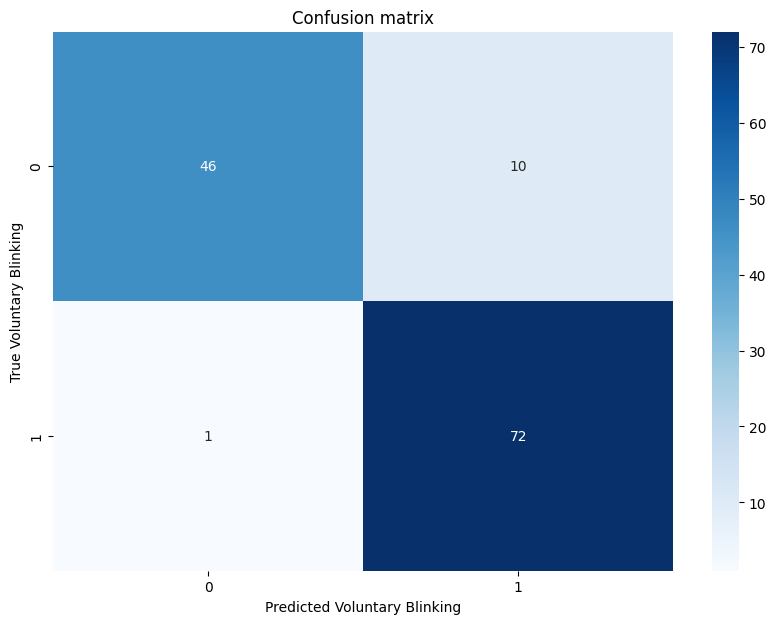

In [39]:
# predict the values from the test dataset
y_pred_jap = model_jap.predict(X_test_jap)
y_pred_jap = [1 if y_jap >= 0.5 else 0 for y_jap in y_pred_jap]  # transform probabilities into binary outputs

# Compute the confusion matrix
conf_mat_jap = confusion_matrix(y_test_jap, y_pred_jap)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_mat_jap, annot=True, fmt='d', cmap="Blues")
plt.title('Confusion matrix')
plt.xlabel('Predicted Voluntary Blinking')
plt.ylabel('True Voluntary Blinking')
plt.show()

In [40]:
# Generate the classification report
report_jap = classification_report(y_test_jap, y_pred_jap)

print(report_jap)

              precision    recall  f1-score   support

         0.0       0.98      0.82      0.89        56
         1.0       0.88      0.99      0.93        73

    accuracy                           0.91       129
   macro avg       0.93      0.90      0.91       129
weighted avg       0.92      0.91      0.91       129

